# Notebook Showing Linear Regression

In [2]:
import os

import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.metrics import r2_score

import statsmodels.formula.api as smf

In [3]:
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
df = pd.read_pickle('../Chapter 7 - Data Preparation and Visualization/claims_df')

In [7]:
lm = linear_model.LinearRegression()

X = df[['gender_2', 'ESRD_Y']].values

y = df.TOTAL_LOG_PAID.values

lm.fit(X, y)

y_pred = lm.predict(X)

print(r2_score(y, y_pred))

print(lm.intercept_)

print(lm.coef_)

0.0857079181784749
7.18945647870259
[0.1079295  1.51031588]


In [8]:
mod = smf.ols(formula='TOTAL_LOG_PAID ~ gender_2 + ESRD_Y', data=df)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         TOTAL_LOG_PAID   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     220.2
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           4.06e-92
Time:                        00:47:13   Log-Likelihood:                -8611.6
No. Observations:                4700   AIC:                         1.723e+04
Df Residuals:                    4697   BIC:                         1.725e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1895      0.034    211.226      0.0

In [22]:
output_df = pd.DataFrame({'y': y, 'y_pred': y_pred})

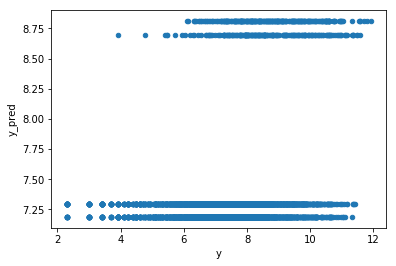

In [24]:
output_df.plot.scatter(x='y', y='y_pred');